# Actividad 2
---

##### Integrantes:
<i> - Hugo Torricos
<br><i> - Alejandro Tolosa
<br><i> - Isabel Catalán
<br><i> - Anderson Suárez

---
<i> Importar librerías:

In [223]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

---

### Solución cerrada de regresión lineal

##### Utilizando Numpy o Scipy genere 1,000 datos que distribuyan uniforme entre 0 y 3, U (0, 3). Este arreglo representará su variable independiente, también denominado a lo largo de este curso como feature, descriptor o input.

In [224]:
x = np.random.uniform(0, 3, 1000)

<i> -  Para crear la variable independiente (X), utilizamos la función random.uniform devuelve números aleatorios en el rango que hemos definido entre 0 y 3, extraído de una distribución uniforme

##### A través de la misma librería genere los 1,000 datos de la variable dependiente, también conocida como target u output, de la siguiente forma y = 5 + 2x + U (2, 4)

In [225]:
y = 5 + 2 * x + np.random.uniform(2, 4, 1000)

<i> - Para crear la variable dependiente, defininmos el valor 5 para el intercepto, "2x" sería la multiplicación del valor independiente por 2, lo que generaría la pendiente y finalmente, utilizamos la función random.uniform para que esos 1000 datos generados se encuentren entre un rango de 2 a 4

##### Por medio de matplotlib o seaborn genere un gráfico de dispersión (scatter plot) entre la variable dependiente y la variable independiente. Ajuste título, nombre de ejes, tamaño de los valores en los ejes, tamaño de la fugura, colores de los y la transparencia de los puntos.

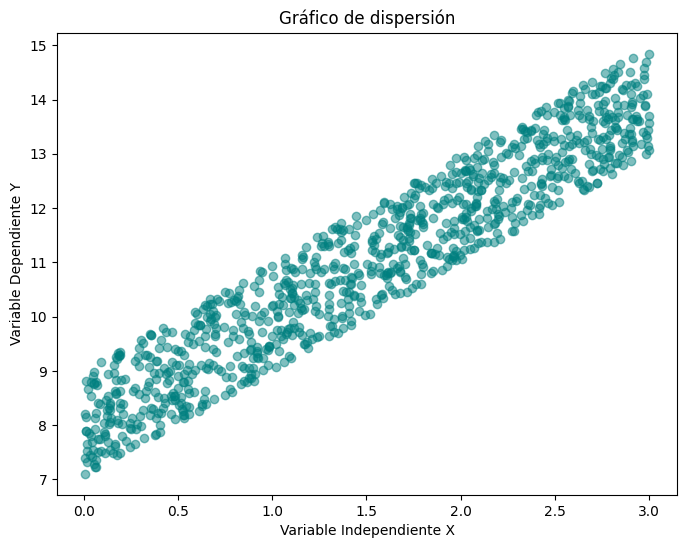

In [226]:
plt.figure(figsize=[8,6])
plt.title("Gráfico de dispersión")
plt.xlabel("Variable Independiente X")
plt.ylabel("Variable Dependiente Y")
plt.scatter(x, y, c= '#008080', alpha= 0.5)
plt.show()

<i> - Los 1000 generados se representan en la grafica generada, en donde las variable independientes se encuentran en un rango entre 0 y 3, y la variable dependiente tiene como resultado la sumatoria del intercepto (5), el valor aleatorio entre 2 a 4 y la multiplicacion de la variable independiente por dos, de modo que el valor míinimo independiente "0" debería tener como valor dependiente entre 7 a 9 -> (5 + 0*2 + "Valor entre 2 y 4") y el valor independiente máximo "3" debería tener un valor dependiente en un rango comprendido entre 13 y 15 -> (5 + 3*2 + "Valor entre 2 y 4").

El código "plt.figure" determina el tamaño del gráfico, "plt.title" lo utilizamos para determinar el nómbre del gráfico, "plt.xlabel" lo usamos para dar el nómbre de la etiqueta de la variable independiente y "plt.ylabel" para la etiqueta de la variable independiente; "plt.scatter" genera un gráfico de dispersión y dentro de ese código "c" define el color, el cual utilizamos un código hexadecimal para que nos de un color turquesa, y "alpha" define la transparencia.


##### Genere una función que permita visualizar los datos simulados.  Esta función debe recibir como argumentos la variable dependiente y, la variable independiente x y el número de datos a simular. La función debe permitir visualizar o guardar la imagen

In [227]:
def visualizar(self, y, x, num):

    plt.figure(figsize=[8,6])
    plt.title("Scatter Plot")
    plt.xlabel("Variable Independiente X")
    plt.ylabel("Variable Dependiente Y")
    plt.scatter(x[:num], y[:num], c='#008080', alpha=0.5)

    option = int(input("(1) Para visualizar | (2) Para Guardar: "))
    if option == 1:
        plt.show()
    elif option == 2:
        plt.savefig("imagen1.jpg")

##### Aplique las operaciones matriciales necesarias para ajustar una regresión lineal a través de su solución cerrada (use numpy.linalg). Cree una función que reciba la variable dependiente y la variable independiente, esta función debe retornar los parámetros optimizados.

In [228]:
def optimizar( y, x):
    X = np.array([[i, 1] for i in x])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

def resultado( x, y, m, b, num):
    plt.figure()
    plt.scatter(x[:num], y[:num], marker = '.',c='#008080', alpha=0.5)
    x2 = np.linspace(0, max(x), 1000)
    y2 = m*x2 + b
    plt.plot(x2, y2, c='#ff0000')
    plt.show()



##### Utilizando  Matplotlib  o  seaborn  genere  un  gráfico  que  incluya  la  soluci´on  (recta  óptima)  y los datos utilizados.   Cree una función que reciba x,  y  y los parámetros óptimos y cree dicha visualización

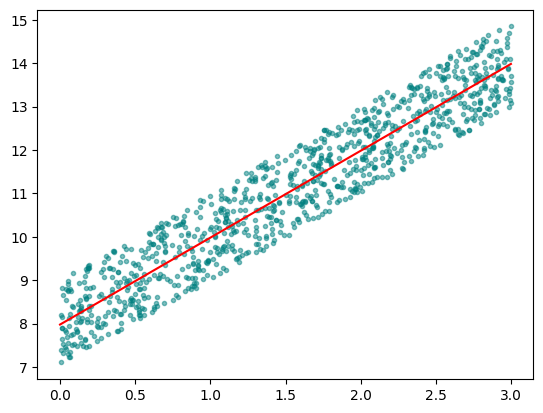

In [229]:
m, b = optimizar(y, x)
resultado(x, y, m, b, -1)

##### Cree una clase cuyo nombre sea "regressionLineal" que contenga los métodos antes generados. La clase debe ser inicializada con los atributos:  tipo de datos (simulado o real) y tamaño de la base de datos

In [230]:
class regressionLineal():

    def __init__(self, tipoDeDatos, N):
        self.tipoDeDatos = tipoDeDatos
        self.tamano = N

    def visualizar(self, y, x, num):

        plt.figure(figsize=[8,6])
        plt.title("Scatter Plot")
        plt.xlabel("Variable Independiente X")
        plt.ylabel("Variable Dependiente Y")
        plt.scatter(x[:num], y[:num], c='#008080', alpha=0.5)

        option = int(input("(1) Para visualizar | (2) Para Guardar: "))
        if option == 1:
            plt.show()
        elif option == 2:
            plt.savefig("imagen1.jpg")

    def optimizar(self, y, x):
        X = np.array([[i, 1] for i in x])
        theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        return theta
    
    def resultado(self, x, y, m, b, num):
        plt.figure()
        plt.scatter(x[:num], y[:num], marker = '.',c='#008080', alpha=0.5)
        x2 = np.linspace(0, max(x), 1000)
        y2 = m*x2 + b
        plt.plot(x2, y2, c='#ff0000')
        plt.show()

---

### Regresión Polinomial

##### Cargue la base de datos adjunta a la actividad (measurements.csv)

In [231]:
tabla = pd.read_csv('measurements.csv')
print(tabla.head())

print(tabla.dtypes)


  distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
0       28       5     26        21,5            12      NaN      E10   0   
1       12     4,2     30        21,5            13      NaN      E10   0   
2     11,2     5,5     38        21,5            15      NaN      E10   0   
3     12,9     3,9     36        21,5            14      NaN      E10   0   
4     18,5     4,5     46        21,5            15      NaN      E10   0   

   rain  sun refill liters refill gas  
0     0    0            45        E10  
1     0    0           NaN        NaN  
2     0    0           NaN        NaN  
3     0    0           NaN        NaN  
4     0    0           NaN        NaN  
distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: ob

In [232]:
Variables = ['distance', 'consume', 'temp_inside', 'refill liters']

for columna in Variables:
    tabla[columna] = tabla[columna].str.replace(',', '.').astype(float)

print(tabla.dtypes)

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object


##### Mediante Matplotlib o seaborn visualizar las variables contenidas en la base de datos con un scatter plot.

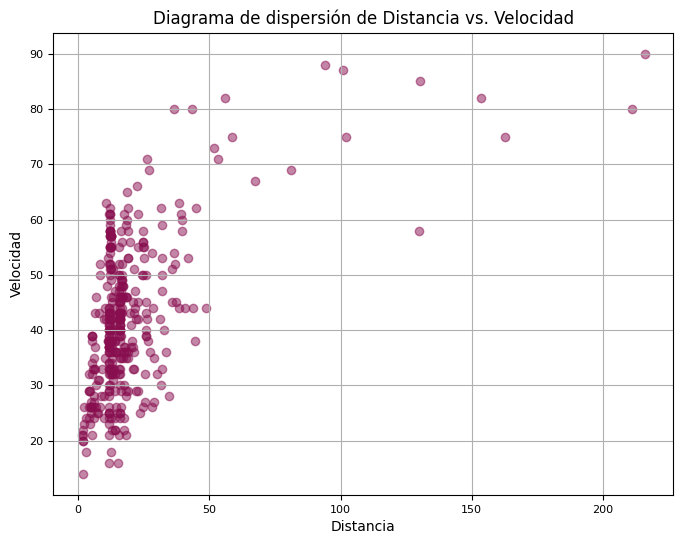

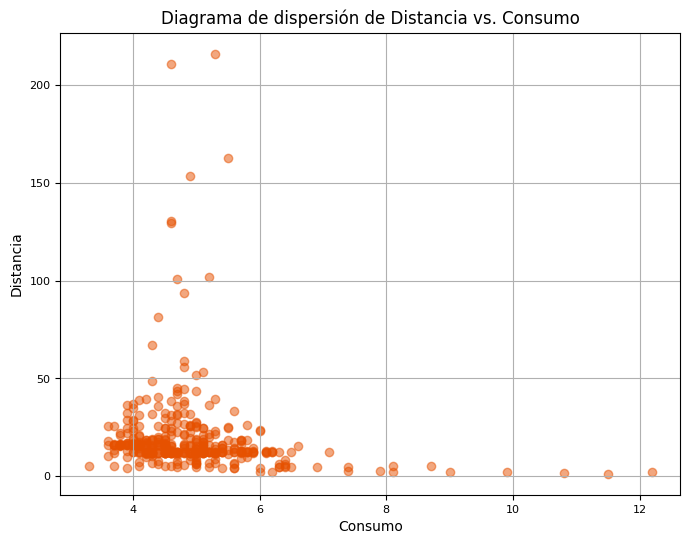

In [233]:
plt.figure(figsize=[8,6])
plt.scatter(tabla['distance'], tabla['speed'], c='#880e4f', alpha=0.5)
plt.title("Diagrama de dispersión de Distancia vs. Velocidad")
plt.xlabel("Distancia")
plt.ylabel("Velocidad")
plt.grid(True)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

plt.figure(figsize=[8,6])
plt.scatter(tabla['consume'], tabla['distance'], c='#e65100', alpha=0.5)
plt.title("Diagrama de dispersión de Distancia vs. Consumo")
plt.xlabel("Consumo")
plt.ylabel("Distancia")
plt.grid(True)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


##### Use la regresión lineal previamente implementada para predecir el consumo (consume) mediante la distancia recorrida (distance). Se recomienda usar la clase previamente implementada regressionLineal, sin embargo, también se permite usar funciones aisladas. El uso de métodos disponibles en sklearn también está permitido pero se evaluará con la mitad del puntaje asignado a este item.

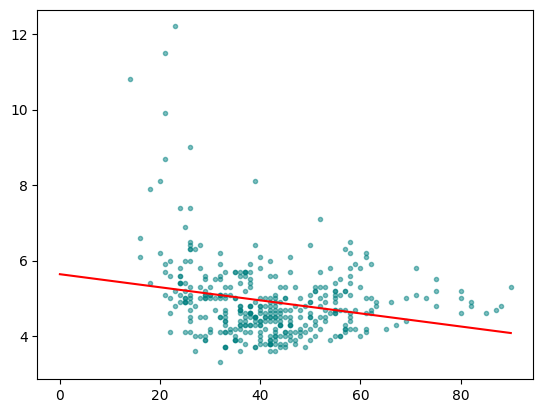

In [234]:
r2 = regressionLineal("real", len(tabla))

m2, b2 = r2.optimizar(tabla['consume'],tabla['speed'])
r2.resultado(tabla['speed'], tabla['consume'], m2, b2, len(tabla))

In [235]:
print(m2,b2)

-0.017312530954206255 5.638248076193369


<i> - La pendiente es negativa (m2) equivalente a -0.017312530954206255 y el intercepto (b2) es de 5.638248076193369


##### Genere una transformación polinomial de la variable independiente, para esta transformación se recomienda utilizar el método disponible por sklearn preprocessing.PolynomialFeatures).

##### Ajuste regresiones polinomiales de diferentes grados.

##### Grafique los modelos resultantes

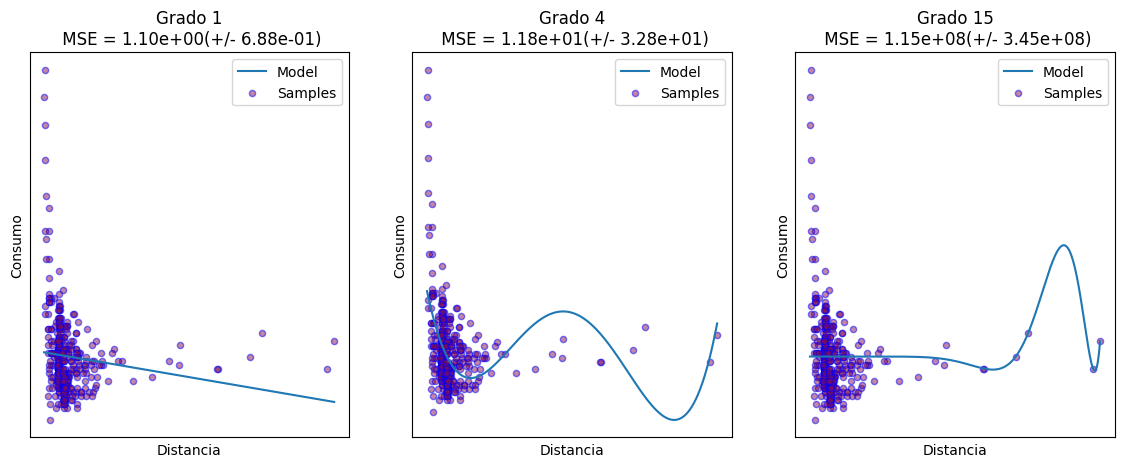

In [236]:
n_samples = 30
degrees = [1, 4, 15]


plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    xNew = np.array(tabla['distance']).reshape((-1,1))
    pipeline.fit(xNew, tabla['consume'])

    scores = cross_val_score(
        pipeline, xNew, tabla['consume'], scoring="neg_mean_squared_error", cv=10
    )


    plt.plot((np.linspace(min(xNew),max(xNew),1000)), pipeline.predict(np.linspace(min(xNew),max(xNew),1000)), label="Model")
    plt.scatter(tabla['distance'], tabla['consume'], edgecolor="b", s=20, label="Samples",  c='#880e4f', alpha=0.5)
    plt.xlabel("Distancia")
    plt.ylabel("Consumo")

    plt.legend(loc="best")
    plt.title(
        "Grado {}\n MSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()


##### ¿Qué observa en el error cuadrático medio y en la forma de las predicciones a medida que aumenta el grado del polinomio?

<i> - Notamos que el error cuadrático medio no se ajusta a como esperábamos. Entonces nos dimos cuenta que el modelo aprende bien la data de entrenamiento, pero de memoria sin considerar factores externos y eso hace que al momento de testear falle y no generalice bien. Debido a que no logra entender las diferencias entre lo que no es ruido o datos atípicos, ya sea datos que no son útiles.

<i>

---

### Regresión con Penalización

##### Separe la base de datos en una para ajustar el modelo y otra para testearlo (80%-20%)

In [238]:
tabla2 = pd.read_csv('measurements.csv')

tabla2['distance'] = tabla2['distance'].str.replace(',', '.').astype(float)
tabla2['consume'] = tabla2['consume'].str.replace(',', '.').astype(float)

X = tabla2[['distance']] 
y = tabla2['consume']


##### Utilizando la misma base de datos y una transformación polinomial de grado mayor a 5, ajuste en los datos de entrenamiento regresión ridge y Lasso (from sklearn.linear model  import Lasso, ridge).

In [239]:
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

##### Modifique el parámetro de penalización y obtenga los valores de los parámetros y grafique las predicciones ¿Qué puede comentar al respecto? ¿Qué ocurre al aumentar el valor de alfa (penalización) en cada modelo? ¿qué diferencia se observa entre ridge y Lasso?.

c:\Users\aleja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.29503e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\aleja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.351e+02, tolerance: 3.423e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\aleja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.85901e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\aleja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_c

[[0.01, 0.7132020576737329, 0.7443126135040737], [0.02, 0.7131890976891275, 0.7444783914756025], [0.03, 0.7131761397694986, 0.7446540308191207], [0.04, 0.7131631841038235, 0.7448395315346347], [0.05, 0.7131502309435894, 0.7450348936221333], [0.06, 0.713137279266953, 0.7452401170816199], [0.07, 0.7131243304531076, 0.7454552019131027], [0.08, 0.713111383944974, 0.7456801481165695], [0.09, 0.7130984394073434, 0.7459149556920313], [0.1, 0.7130854971414243, 0.7461596246394812], [0.11, 0.7130725571320559, 0.7464141543878083], [0.12, 0.713059619341883, 0.7466785460246642], [0.13, 0.7130466835354885, 0.7469527990330638], [0.14, 0.7130337500800817, 0.7472369134130123], [0.15, 0.7130208189862712, 0.7475308891645073], [0.16, 0.7130078902122925, 0.7478347262875523], [0.17, 0.7129949629021228, 0.7481484247821443], [0.18, 0.7129820383570266, 0.7484719846482807], [0.19, 0.7129691160921449, 0.7488054058859683], [0.2, 0.7129561962466935, 0.7491486884952007], [0.21, 0.7129432782094174, 0.749501832475987

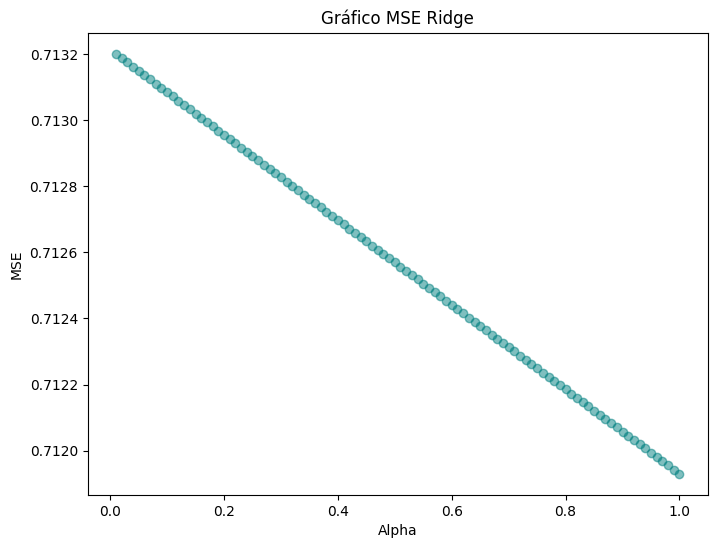

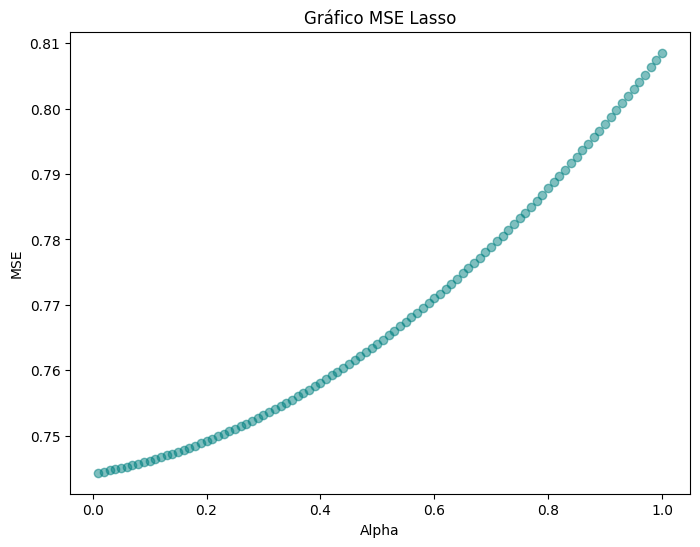

In [240]:
MSE=[]

for x in range(1,101,1):
    x = x/100
    # Crear y ajustar el modelo Ridge
    ridge = Ridge(alpha=x)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    # Crear y ajustar el modelo Lasso
    lasso = Lasso(alpha=x)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    # Evaluar el desempeño de ambos modelos
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)

    MSE.append([float(x),float(mse_ridge),float(mse_lasso)])
# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(MSE, columns=['Alpha', 'MSE_Ridge', 'MSE_Lasso'])

print(MSE)


plt.figure(figsize=[8,6])
plt.title("Gráfico MSE Ridge")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.scatter(np.array(results_df['Alpha']), np.array(results_df['MSE_Ridge']), c= '#008080', alpha= 0.5)
plt.show()


plt.figure(figsize=[8,6])
plt.title("Gráfico MSE Lasso")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.scatter(np.array(results_df['Alpha']), np.array(results_df['MSE_Lasso']), c= '#008080', alpha= 0.5)
plt.show()


<i> - En el modelo de Ridge se observa que a medida de que aumenta el Aplha, disminuye el error, mientras que en el modelo de Lasso para este caso aumenta el MSE, a medida que aumenta el Alpha.

##### Seleccione el modelo adecuado de acuerdo al error cuadrático medio.

<i> El modelo adecuado de penalizacion es el de Ridge, se observa que para cualquier valor de Aplha para este conjunto de datos es menor al MSE entregado por el modelo de Lasso